<center><b><h1>Mini-Project On Sentiment Analysis in Finance and Stocks</h1></b></center>

### What is Sentiment Analysis?
Sentiment analysis classifies whether a text block is positive, negative, or neutral. The goal that Sentiment mining tries to gain is to analyze people's opinions in a way that can help businesses expand. It focuses on polarity (positive, negative & neutral) and emotions (happy, sad, angry, etc.). It uses various Natural Language Processing algorithms such as Rule-based, Automatic, and Hybrid.



Let's consider a scenario if we want to analyze whether a product satisfies customer requirements or if there is a need for this product in the market. We can use sentiment analysis to monitor that product's reviews. Sentiment analysis is also efficient when there is a large set of unstructured data, and we want to classify that data by automatically tagging it. Net Promoter Score (NPS) surveys are used extensively to learn how a customer perceives a product or service. Sentiment analysis also gained popularity due to its ability to process significant NPS responses and obtain consistent results quickly.

### Libraries used - pandas,transformers,matplotlib

Firstly we will receive our data with the correct encoding, and add header columns <br>
__[data from kaggle](https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news)__

In [8]:
import pandas as pd
df = pd.read_csv('all-data.csv', encoding='latin1')
df.columns = ['GivenSentiment', 'Content'] #adding header columns
df


,GivenSentiment,Content
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...


In [9]:
df=df.sample(200) #lets see a smaller sample , given sentiments are neut,positive,negative
df

,GivenSentiment,Content
2807,neutral,"As a condition to the deal , Savcor Alfa has t..."
4235,neutral,So Mr. Galvan made savings adjustments of his ...
3396,neutral,The value of the orders is about EUR 25mn .
4087,positive,Lean System supports change management and com...
2288,positive,"mn , and pretax profit to EUR 46.4 mn from EUR..."
...,...,...
1481,positive,`` The Intel Atom processor has had tremendous...
3753,neutral,Technopolis has set aside a plot of land measu...
2163,neutral,Net sales of the Lehdentekijat unit was approx...
2119,neutral,"In 2007 , the Group 's net sales stood at EUR ..."


In [10]:
from transformers import pipeline
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
tokenizer=DistilBertTokenizer.from_pretrained('distilbert/distilbert-base-uncased-finetuned-sst-2-english')
model=DistilBertForSequenceClassification.from_pretrained('distilbert/distilbert-base-uncased-finetuned-sst-2-english')

In [11]:
nlp=pipeline('sentiment-analysis', model=model , tokenizer=tokenizer)
texts=list(df.Content.values)
results=nlp(texts)


In [12]:
for text, result in zip(texts,results):
    print('Text',text)
    print('Result',result)

Text As a condition to the deal , Savcor Alfa has to have bought Photonium and Akseli Lahtinen Inc. 's business operations prior to the deal .
Result {'label': 'NEGATIVE', 'score': 0.9782177209854126}
Text So Mr. Galvan made savings adjustments of his own , buying less liquor and watching portion sizes .
Result {'label': 'NEGATIVE', 'score': 0.9985694885253906}
Text The value of the orders is about EUR 25mn .
Result {'label': 'NEGATIVE', 'score': 0.9743809103965759}
Text Lean System supports change management and component purchasing extremely well .
Result {'label': 'POSITIVE', 'score': 0.9993797540664673}
Text mn , and pretax profit to EUR 46.4 mn from EUR 35.8 mn in the third quarter of 2006 .
Result {'label': 'NEGATIVE', 'score': 0.9885552525520325}
Text The value of the contracts is about EUR 3.3 mn .
Result {'label': 'NEGATIVE', 'score': 0.9872360825538635}
Text Sales by Seppala diminished by 6 per cent .
Result {'label': 'NEGATIVE', 'score': 0.9997032284736633}
Text Thus , SysOp

In [13]:
df['PredictedSentiment']=[i['label'] for i in results]
df

,GivenSentiment,Content,PredictedSentiment
2807,neutral,"As a condition to the deal , Savcor Alfa has t...",NEGATIVE
4235,neutral,So Mr. Galvan made savings adjustments of his ...,NEGATIVE
3396,neutral,The value of the orders is about EUR 25mn .,NEGATIVE
4087,positive,Lean System supports change management and com...,POSITIVE
2288,positive,"mn , and pretax profit to EUR 46.4 mn from EUR...",NEGATIVE
...,...,...,...
1481,positive,`` The Intel Atom processor has had tremendous...,POSITIVE
3753,neutral,Technopolis has set aside a plot of land measu...,NEGATIVE
2163,neutral,Net sales of the Lehdentekijat unit was approx...,POSITIVE
2119,neutral,"In 2007 , the Group 's net sales stood at EUR ...",NEGATIVE


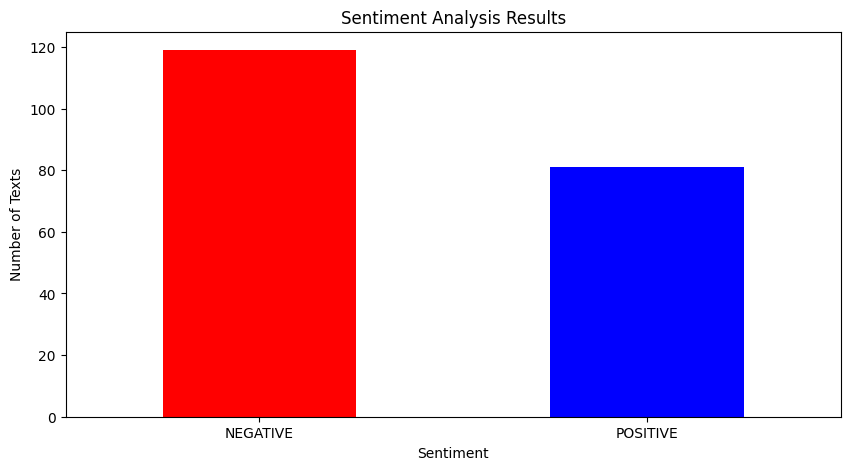

PredictedSentiment
NEGATIVE    119
POSITIVE     81
Name: count, dtype: int64


In [14]:
import matplotlib.pyplot as plt
# Count the occurrences of each sentiment
sentiment_counts = df['PredictedSentiment'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 5))
sentiment_counts.plot(kind='bar', color=['red', 'blue'])
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Number of Texts')
plt.xticks(rotation=0)
plt.show()

print(sentiment_counts)